# Experiment 10: Real-time Data Warehousing using Streaming Data

## Real-time data warehousing with streaming integration. Continuously ingest and store live data for dynamic analysis. Implement efficient data handling and visualization. 

### In this notebook, data is inserted into MySQL, retrieved from the database, and visualized through various plots.

### ✅ **Creating a Connector to Connect to MySQL**

1. **`import mysql.connector`**  
   - This statement imports the **MySQL Connector/Python** library. It allows Python programs to communicate with a MySQL database server, enabling the execution of SQL queries, data retrieval, and other database operations.

2. **`db = mysql.connector.connect(...)`**  
   - This function establishes a connection to the MySQL server and returns a **connection object**, which is assigned to the variable `db`.  
   - Several key parameters are passed to configure the connection:
     - `host="localhost"` specifies the server address. Using `localhost` means the server resides on the same machine as the Python application.
     - `user="username"` sets the MySQL username for authentication. The `username` user is typically the default administrative account with full privileges.
     - `password="your_password"` provides the password associated with the user account. (Note: In a production environment, credentials should be securely stored rather than hardcoded.)
     - `port=3305` indicates the port number on which the MySQL server is listening. While MySQL’s default port is `3306`, this configuration uses `3305`.
     - `auth_plugin='mysql_native_password'` specifies the authentication plugin. `mysql_native_password` ensures compatibility with clients and servers that use this legacy authentication method.

3. **`cursor = db.cursor()`**  
   - This command creates a **cursor object**, which acts as an interface to execute SQL commands and retrieve results from the MySQL database.  
   - The cursor facilitates interaction with the database, such as running queries, fetching data, and managing transactions.

In [34]:
# ====================== Import Required Library ======================
import mysql.connector  # Imports the official MySQL connector module for Python, enabling database interactions.

# ====================== Establishing Database Connection ======================
# The following code establishes a connection to a MySQL server running on the local machine.
db = mysql.connector.connect(
    host="localhost",                   # Specifies the server address. 'localhost' indicates that the server is hosted on the same machine.
    user="username",                        # The MySQL user account name. 'root' typically has administrative privileges.
    password="your_password",               # The password for the 'root' user. In production, credentials should be secured.
    port=3305,                          # The port number the MySQL server listens on. The default port is 3306, but this instance runs on 3305.
    auth_plugin='mysql_native_password' # Specifies the authentication plugin for compatibility with older MySQL clients.
)

# ====================== Creating a Cursor Object ======================
# A cursor is used to execute SQL commands and retrieve results from the database.
cursor = db.cursor()

# At this point, the cursor can be used to execute queries such as:
# cursor.execute("SHOW DATABASES")
# result = cursor.fetchall()
# print(result)

### 📘 Explanation

#### ✅ **Creating a Database and Table for Real-Time Data**

This script performs the following actions step by step:

1. **Creating the Database**  
   - The `CREATE DATABASE IF NOT EXISTS streaming_warehouse` statement ensures that the database is created only if it doesn't already exist. This avoids errors if the script runs multiple times.
   - The `USE streaming_warehouse` statement selects the newly created (or existing) database for subsequent operations.

2. **Creating the Table `real_time_data`**  
   - The `CREATE TABLE IF NOT EXISTS real_time_data` command defines the structure of a table intended to store real-time streaming data.
   - The table includes the following columns:
     - `id`: A unique, auto-incrementing identifier for each record. Acts as the primary key.
     - `timestamp`: Automatically records the time when a new record is inserted. Defaults to the current system timestamp.
     - `sensor_value`: Stores the numerical value recorded from a sensor. The `FLOAT` type allows for decimal values.
     - `device_name`: Holds the name of the device that sent the data, with a maximum length of 50 characters.
     - `status`: Describes the state of the data or device (e.g., "active", "inactive"), with a maximum length of 20 characters.

3. **Committing Changes**  
   - The `db.commit()` call finalizes and saves the changes made by the previous SQL commands. Without this, the new table and database might not persist.

4. **Closing the Connection**  
   - After completing the database operations, both the `cursor` and the `db` connection are closed. This is important to release server resources and prevent potential connection leaks.

#### 📝 **Best Practices**
- Always close the cursor and database connection after completing operations.
- Using `IF NOT EXISTS` ensures that the code is **idempotent**, meaning it can run multiple times without causing errors.
- It's recommended to add error handling (`try-except` blocks) to catch and manage potential exceptions during database operations.

In [23]:
# ====================== Create Database ======================
# Executes an SQL statement to create a new database named 'streaming_warehouse'
# if it does not already exist. This ensures the database is available for further operations.
cursor.execute("CREATE DATABASE IF NOT EXISTS streaming_warehouse")

# Selects 'streaming_warehouse' as the active database for upcoming operations.
cursor.execute("USE streaming_warehouse")

# ====================== Create Table for Real-time Data ======================
# Executes an SQL statement to create a table named 'real_time_data' if it does not already exist.
# This table is structured to store real-time data from sensors along with related metadata.
cursor.execute("""
    CREATE TABLE IF NOT EXISTS real_time_data (
        id INT AUTO_INCREMENT PRIMARY KEY,
        timestamp TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
        sensor_value FLOAT,
        device_name VARCHAR(50),
        status VARCHAR(20)
    )
""")

# ====================== Commit Changes ======================
# Commits the changes made by the CREATE DATABASE and CREATE TABLE operations.
# This ensures that the modifications are saved and made permanent in the database.
db.commit()

# ====================== Confirmation Message ======================
# Prints a success message to confirm that the database and table were created successfully.
print("✅ Database and table created successfully.")

# ====================== Close Connection ======================
# Closes the cursor object to release associated resources.
cursor.close()

# Closes the connection to the MySQL database server to free up resources and ensure proper cleanup.
db.close()

✅ Database and table created successfully.


### 📄 **Explanation for the Script**

This Python script simulates real-time sensor data streaming, stores it in a MySQL database, and generates real-time plots of the latest data points.
It performs the following actions:
1. **Simulates sensor data generation**: Randomly generates data for different devices and statuses.
2. **Stores the data**: Inserts sensor data into a MySQL database (`real_time_data` table).
3. **Fetches recent data**: Selects the most recent 20 records that are not marked as "Warning".
4. **Plots the data**: Generates and saves plots to visualize the sensor values over time.
5. **Repeats the process**: Continues the simulation until four plots are generated.

---

### **Modules Imported**
| **Module**            | **Purpose**                                          |
|-----------------------|------------------------------------------------------|
| `warnings`            | Suppresses unnecessary warnings.                    |
| `time`                | Adds delays between data insertions to simulate real-time behavior. |
| `random`              | Generates random sensor values and statuses.         |
| `pandas`              | Organizes and manipulates data fetched from the database. |
| `matplotlib.pyplot`   | Plots graphs of sensor values over time.             |
| `seaborn`             | Enhances the visual aesthetics of plots.             |
| `datetime`            | Manages timestamps and simulates data collection time gaps. |
| `os`                  | Manages directory creation for storing plots.        |

---

### **Key Features**
✅ **Warning Suppression**  
- Warnings are suppressed at the beginning of the script using `warnings.filterwarnings('ignore')` to keep output clean.

✅ **Insert Query**  
- An `INSERT` statement is pre-defined and populated dynamically with random data.

✅ **Data Streaming Loop**  
- Simulates real-time data by:
  - Generating random sensor values.
  - Selecting random device names and statuses.
  - Introducing random time delays between data points.
  - Incrementing timestamps and inserting data into the database.
  
✅ **Plotting Functionality**  
- `fetch_and_plot()` retrieves the latest data (excluding "Warning" statuses) and generates line plots.
- Plots include:
  - Separate lines for "Normal" and "Critical" statuses.
  - Shaded regions indicating "Normal Zone" (green) and "Critical Zone" (red).
- Plots are saved inside the `Plots/` folder for better file management.

✅ **Graceful Exit & Cleanup**  
- The script captures `KeyboardInterrupt` exceptions to allow manual termination.
- Cursor and database connections are closed gracefully at the end.

📡 Data Sent: 11.44 | Sensor_A | Critical | Timestamp: 2025-03-09 21:48:27.429752
📊 Plot saved: Plots/Real Time Plot 1.png


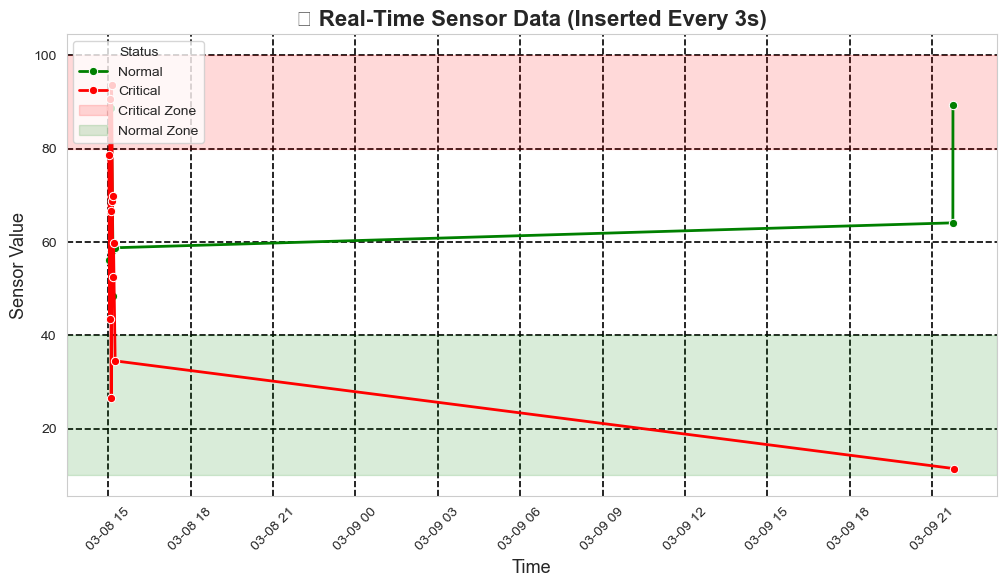

📡 Data Sent: 12.09 | Sensor_D | Critical | Timestamp: 2025-03-09 21:48:33.429752
📊 Plot saved: Plots/Real Time Plot 2.png


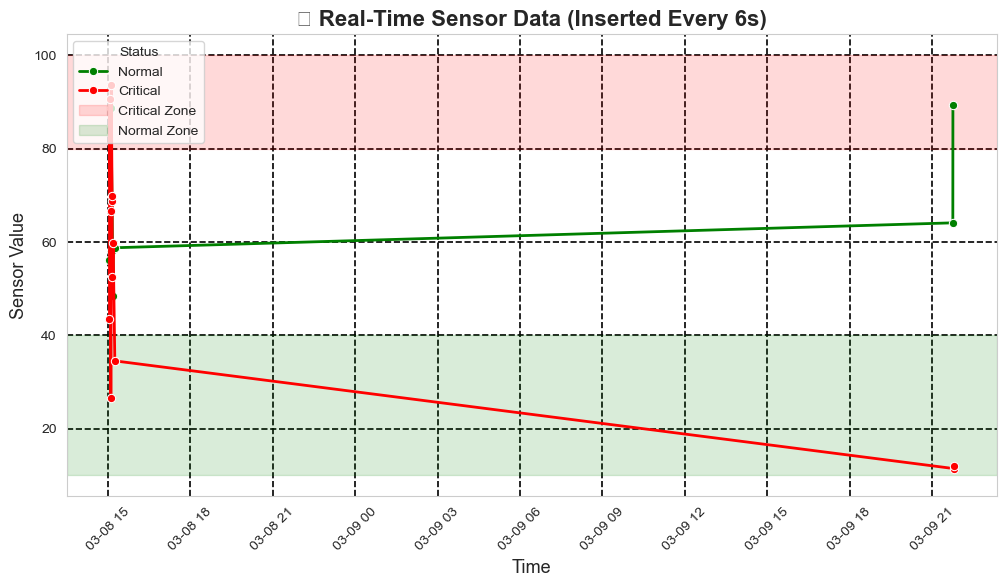

📡 Data Sent: 12.43 | Sensor_C | Normal | Timestamp: 2025-03-09 21:48:36.429752
📊 Plot saved: Plots/Real Time Plot 3.png


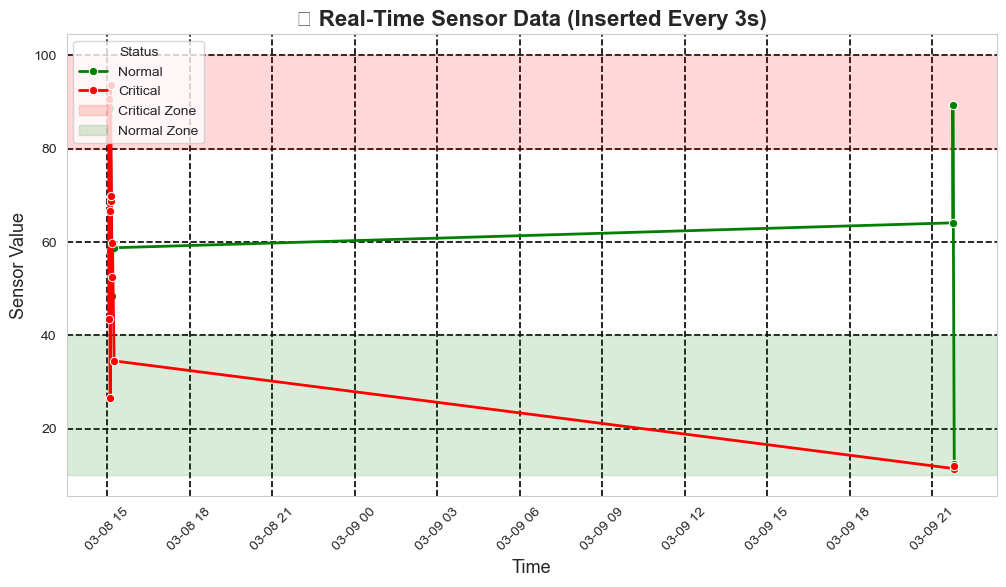

📡 Data Sent: 29.05 | Sensor_A | Normal | Timestamp: 2025-03-09 21:48:41.429752
📊 Plot saved: Plots/Real Time Plot 4.png


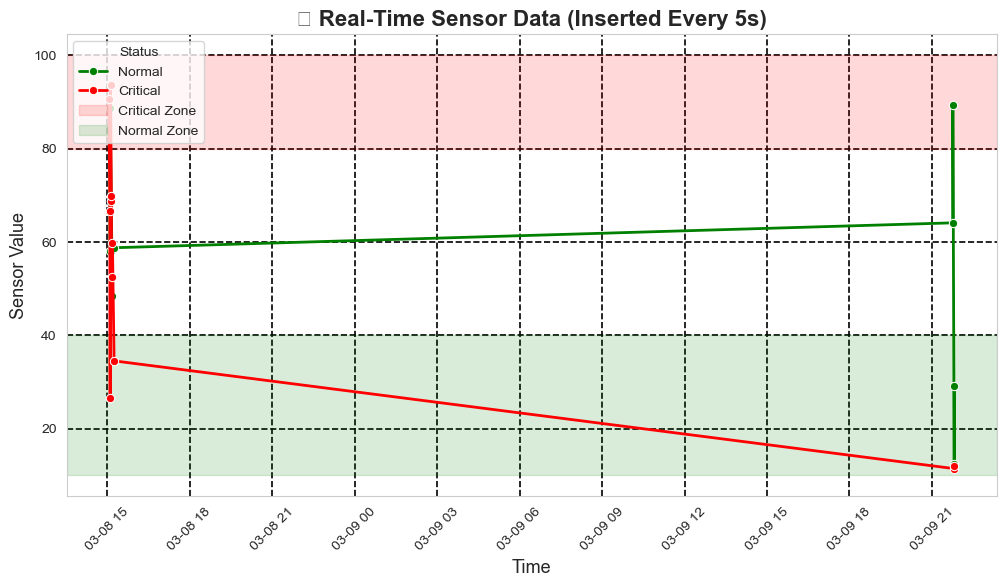

✅ Data ingestion has stopped after 4 plots.


In [36]:
# ====================== Imports and Configurations ======================

import warnings
warnings.filterwarnings('ignore')  # Ignores all warning messages that may clutter output

import time                    # Provides time-related functions for delays
import random                  # Generates random numbers for sensor data simulation
import pandas as pd            # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns          # For advanced plotting styles
from datetime import datetime, timedelta  # To manage timestamps and time intervals
import os                      # To handle directory operations

# ====================== Database Insert Query ======================

# Selects 'streaming_warehouse' as the active database for upcoming operations.
cursor.execute("USE streaming_warehouse")

# SQL query template for inserting real-time sensor data into the 'real_time_data' table.
insert_query = """
    INSERT INTO real_time_data (timestamp, sensor_value, device_name, status)
    VALUES (%s, %s, %s, %s)
"""

# ====================== Sample Data Initialization ======================

# List of device names to randomly select from.
devices = ["Sensor_A", "Sensor_B", "Sensor_C", "Sensor_D"]

# Possible statuses that can be assigned to sensor data.
statuses = ["Normal", "Warning", "Critical"]

# Color mapping for each status, used in plotting.
status_colors = {"Normal": "green", "Warning": "orange", "Critical": "red"}

# Counter to track the number of plots generated.
plot_count = 0

# Minimum and maximum delay (in seconds) between data insertions.
insert_interval = (2, 6)

# Ensure the directory 'Plots' exists for saving generated plots.
if not os.path.exists('Plots'):
    os.makedirs('Plots')

# ====================== Function: Fetch and Plot Data ======================

def fetch_and_plot(insert_delay):
    """
    Fetches the latest 20 records (excluding status 'Warning') from the database
    and generates a line plot showing sensor values over time.
    """
    
    # SQL query to fetch the latest 20 data points, excluding those with status 'Warning'.
    cursor.execute("""
        SELECT timestamp, sensor_value, status 
        FROM real_time_data 
        WHERE status != 'Warning' 
        ORDER BY timestamp DESC 
        LIMIT 20
    """)
    
    data = cursor.fetchall()  # Retrieves query results
    
    # Check if data is available
    if not data:
        print("⚠️ No data available!")
        return

    # Create a pandas DataFrame for easy manipulation and plotting
    df = pd.DataFrame(data, columns=["Timestamp", "Sensor Value", "Status"])
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df = df.sort_values("Timestamp")  # Sort data chronologically

    # ====================== Plotting ======================
    
    plt.figure(figsize=(12, 6))  # Defines the figure size
    sns.set_style("whitegrid")   # Sets the Seaborn plot style

    # Plot separate lines for each status type
    for status in ["Normal", "Critical"]:
        subset = df[df["Status"] == status]
        
        # If there is no data for a particular status, skip plotting
        if subset.empty:
            print(f"⚠️ No data available for status: {status}")
            continue
        
        sns.lineplot(
            data=subset,
            x="Timestamp",
            y="Sensor Value",
            marker="o",
            linewidth=2,
            label=status,
            color=status_colors[status]
        )

    # Highlight areas for critical and normal sensor value zones
    plt.axhspan(80, 100, color="red", alpha=0.15, label="Critical Zone")
    plt.axhspan(10, 40, color="green", alpha=0.15, label="Normal Zone")

    # Plot customization
    plt.title(f"📡 Real-Time Sensor Data (Inserted Every {insert_delay}s)", fontsize=16, fontweight="bold")
    plt.xlabel("Time", fontsize=13)
    plt.ylabel("Sensor Value", fontsize=13)
    plt.xticks(rotation=45)
    plt.legend(title="Status", loc="upper left")
    plt.grid(True, linestyle="--", linewidth=1.2, color="black")

    # Save the plot to the 'Plots' directory
    global plot_count
    filename = f"Plots/Real Time Plot {plot_count+1}.png"
    plt.savefig(filename, transparent=True, dpi=300)
    print(f"📊 Plot saved: {filename}")

    plt.show()  # Display the plot inline (optional in scripts)

# ====================== Streaming Simulation and Plotting ======================

try:
    last_timestamp = datetime.now()  # Initializes the first timestamp
    
    # The loop simulates data streaming and plotting for a defined number of times (4).
    while plot_count < 4:
        # Generate random sensor values within a realistic range (10 to 100).
        sensor_value = round(random.uniform(10, 100), 2)
        device_name = random.choice(devices)
        status = random.choice(statuses)
        
        # Random delay to simulate irregular sensor data intervals
        insert_delay = random.randint(insert_interval[0], insert_interval[1])
        
        # Increment the timestamp by the delay
        last_timestamp += timedelta(seconds=insert_delay)
        
        # Insert generated data into the database
        cursor.execute(insert_query, (last_timestamp, sensor_value, device_name, status))
        db.commit()  # Persist the changes in the database
        
        print(f"📡 Data Sent: {sensor_value} | {device_name} | {status} | Timestamp: {last_timestamp}")

        # Pause execution for the delay interval to simulate real-time behavior
        time.sleep(insert_delay)

        # Fetch and plot the data, passing the current delay for the plot title
        fetch_and_plot(insert_delay)
        
        # Increment the plot counter
        plot_count += 1

except KeyboardInterrupt:
    print("❌ Streaming stopped manually.")

# ====================== Cleanup ======================

# Close the cursor and database connection after the loop completes
cursor.close()
db.close()

print("✅ Data ingestion has stopped after 4 plots.")